In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(x_train, y_train, k=5):
    num_samples=len(x_train)
    indice=np.arange(num_samples)
    np.random.shuffle(indice)
    fold_sizes=np.full(k,num_samples//k)
    fold_sizes[:num_samples%k]+=1
    current=0
    k_folds=[]

    for fold_size in fold_sizes:
        validation_indice=indice[current:current+fold_size]
        training_indice=np.concatenate([indice[:current],indice[current+fold_size:]])
        k_folds.append([training_indice,validation_indice])
        current+=fold_size

    return k_folds




In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
print(len(kfold_data))
print(len(kfold_data[0]))
print(kfold_data[1][1].shape[0])

10
2
700


In [7]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [8]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  2  3  5  6  7  8  9 12 13 14 15 16 17 18 19], Validation index: [ 1  4 10 11]
Split: 2, Training index: [ 1  2  3  4  5  6  7  8 10 11 13 14 15 17 18 19], Validation index: [ 0  9 12 16]
Split: 3, Training index: [ 0  1  3  4  5  8  9 10 11 12 14 15 16 17 18 19], Validation index: [ 2  6  7 13]
Split: 4, Training index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17], Validation index: [14 15 18 19]
Split: 5, Training index: [ 0  1  2  4  6  7  9 10 11 12 13 14 15 16 18 19], Validation index: [ 3  5  8 17]


In [9]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [10]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [11]:
best_c, best_gamma = None, None
kfold_data = cross_validation(x_train, y_train, k=5)
c_list=[0.01,0.1,1,10]
gamma_list=[0.0001,0.001,0.01,0.1]
acc_score=np.zeros((len(c_list),len(gamma_list)))
best_acc=0

for i in range(len(c_list)):
    for j in range(len(gamma_list)):
        score=0
        for train_idx ,val_idx in kfold_data:
           clf=SVC(C=c_list[i],gamma=gamma_list[j],kernel='rbf')
           clf.fit(x_train[train_idx],y_train[train_idx])
           score+=clf.score(x_train[val_idx],y_train[val_idx])
        
        acc_score[i][j]=score/5
        if acc_score[i][j]>best_acc:
            best_c=c_list[i]
            best_gamma=gamma_list[j]
            best_acc=acc_score[i][j]
# TODO HERE
# k-Flod Cross Validation and Grid Search
best_parameters=(best_c, best_gamma)


In [12]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (1, 0.0001)


# Q3

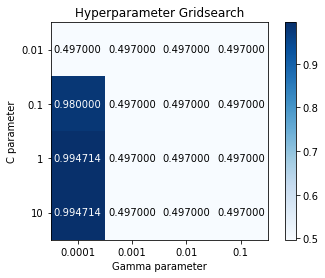

In [13]:
# Plot the grid search results of your SVM

# TODO HERE
cm = acc_score
        
# Create a figure and axis object
fig, ax = plt.subplots()
# Plot the confusion matrix using imshow
im = ax.imshow(cm, cmap='Blues')

# Add a colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Add axis labels and a title to the plot
ax.set_xlabel('Gamma parameter')
ax.set_ylabel('C parameter')
ax.set_title('Hyperparameter Gridsearch')

# Add tick marks to the plot
tick_marks = np.arange(len(cm))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)

# Add labels to the tick marks
x_class_labels = gamma_list
y_class_labels = c_list
ax.set_xticklabels(x_class_labels)
ax.set_yticklabels(y_class_labels)

# Add the actual numbers to the plot
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'f'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()


## Q4

In [14]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
